In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy
!pip install pandas
!pip install tqdm
import re
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spatiotemporal_trn_data.csv")
df.head

<ipython-input-4-ae03d9725225>:1: DtypeWarning: Columns (8,11,13,18,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/spatiotemporal_trn_data.csv")


<bound method NDFrame.head of             STATION                 DATE   LATITUDE  LONGITUDE  ELEVATION  \
0       42369099999  2013-05-05T11:30:00  26.760594  80.889339     124.96   
1       42369099999  2019-01-23T22:00:00  26.760594  80.889339     124.96   
2       42452099999  2005-02-17T08:30:00  25.160219  75.845631     273.10   
3       42369099999  1984-05-20T08:30:00  26.760594  80.889339     124.96   
4       42503099999  2016-11-16T11:30:00  25.033333  88.133333      31.00   
...             ...                  ...        ...        ...        ...   
934802  42452099999  2002-10-27T23:30:00  25.160219  75.845631     273.10   
934803  42260099999  1987-05-23T08:30:00  27.155831  77.960892     167.94   
934804  42634099999  2011-11-01T05:30:00  23.287828  69.670147      81.68   
934805  42369099999  2018-08-22T19:00:00  26.760594  80.889339     124.96   
934806  42634099999  1945-05-16T08:30:00  23.287828  69.670147      81.68   

               NAME REPORT_TYPE  SOURCE Hourl

In [ ]:
# drop columns with all null values
df = df.dropna(axis=1, how='all')

In [ ]:
def get_date_dict(date_str):
    reg = re.compile(r"^(?P<yr>\d{4})-(?P<mon>\d{2})-(?P<day>\d{2})T(?P<hr>\d{2}):(?P<min>\d{2}):(?P<sec>\d{2})$")
    m = reg.match(date_str)
    return m.groupdict()

In [ ]:


# Seperate date data
yr = []
mon = []
day = []
hr = []
mn = []
sec = []
for idx in range(0, len(df)):
    date_dict = get_date_dict(df.DATE[idx])
    yr.append(int(date_dict['yr']))
    mon.append(int(date_dict['mon']))
    day.append(int(date_dict['day']))
    hr.append(int(date_dict['hr']))
    mn.append(int(date_dict['min']))
    sec.append(int(date_dict['sec']))

df.loc[:, 'YEAR'] = pd.Series(yr)
df.loc[:, 'MONTH'] = pd.Series(mon)
df.loc[:, 'DAY'] = pd.Series(day)
df.loc[:, 'HOUR'] = pd.Series(hr)
df.loc[:, 'MINUTES'] = pd.Series(mn)
df.loc[:, 'SECONDS'] = pd.Series(sec)



<ipython-input-7-3a75aa3b2c2d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'YEAR'] = pd.Series(yr)
<ipython-input-7-3a75aa3b2c2d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'MONTH'] = pd.Series(mon)
<ipython-input-7-3a75aa3b2c2d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
# Add targets to same df
df['TARGETS'] = pd.read_csv('/content/drive/MyDrive/spatiotemporal_trn_targets.csv', names=['index', 'TARGETS'])['TARGETS']

<ipython-input-8-034d5d711b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TARGETS'] = pd.read_csv('/content/drive/MyDrive/spatiotemporal_trn_targets.csv', names=['index', 'TARGETS'])['TARGETS']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934807 entries, 0 to 934806
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   STATION                             934807 non-null  int64  
 1   DATE                                934807 non-null  object 
 2   LATITUDE                            934807 non-null  float64
 3   LONGITUDE                           934807 non-null  float64
 4   ELEVATION                           934807 non-null  float64
 5   NAME                                934807 non-null  object 
 6   REPORT_TYPE                         934807 non-null  object 
 7   SOURCE                              934807 non-null  int64  
 8   HourlyAltimeterSetting              217039 non-null  object 
 9   HourlyDewPointTemperature           916829 non-null  object 
 10  HourlyDryBulbTemperature            923010 non-null  object 
 11  HourlyPrecipitation       

In [ ]:
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,HourlyWindSpeed,ShortDurationPrecipitationValue150,REM,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,TARGETS
0,42369099999,2013-05-05T11:30:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-12,4,NaN,61,...,10,NaN,SYN06442369 31996 10909 10378 20159 40029 7050...,2013,5,5,11,30,0,2.49
1,42369099999,2019-01-23T22:00:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-15,4,30.06,55,...,2,NaN,MET067METAR VILK 231630Z VRB02KT 2000 BR SCT02...,2019,1,23,22,0,0,1.24
2,42452099999,2005-02-17T08:30:00,25.160219,75.845631,273.10,"KOTA, IN",FM-12,4,NaN,51,...,5,NaN,SYN076AAXX 17034 42452 32996 32304 10196 2010...,2005,2,17,8,30,0,2.49
3,42369099999,1984-05-20T08:30:00,26.760594,80.889339,124.96,"LUCKNOW, IN",FM-12,4,NaN,41,...,0,NaN,SYN017333 20230 58034,1984,5,20,8,30,0,2.49
4,42503099999,2016-11-16T11:30:00,25.033333,88.133333,31.00,"MALDA, IN",FM-12,4,NaN,55,...,2,NaN,SYN04642503 32996 03202 10280 20127 40164 333 ...,2016,11,16,11,30,0,2.49


In [ ]:
df = df.drop(["SOURCE", "REPORT_TYPE", "NAME", "REM", "DATE", 'LATITUDE', 'LONGITUDE', "HourlyPrecipitation", "HourlyPressureChange","HourlyWindGustSpeed","ShortDurationPrecipitationValue150"],axis=1)

In [ ]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,...,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,TARGETS
0,42369099999,124.96,NaN,61,100,||HZ,9.0,27.0,FEW:01 98,29.62,...,NaN,90,10,2013,5,5,11,30,0,2.49
1,42369099999,124.96,30.06,55,61,NaN,NaN,83.0,SCT:04 20 SCT:04 100,NaN,...,NaN,VRB,2,2019,1,23,22,0,0,1.24
2,42452099999,273.10,NaN,51,67,NaN,9.0,57.0,NaN,29.77,...,NaN,230,5,2005,2,17,8,30,0,2.49
3,42369099999,124.96,NaN,41,94,||DU,9.0,16.0,NaN,29.55,...,NaN,0,0,1984,5,20,8,30,0,2.49
4,42503099999,31.00,NaN,55,82,NaN,9.0,39.0,NaN,30.01,...,NaN,320,2,2016,11,16,11,30,0,2.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934807 entries, 0 to 934806
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    934807 non-null  int64  
 1   ELEVATION                  934807 non-null  float64
 2   HourlyAltimeterSetting     217039 non-null  object 
 3   HourlyDewPointTemperature  916829 non-null  object 
 4   HourlyDryBulbTemperature   923010 non-null  object 
 5   HourlyPresentWeatherType   398691 non-null  object 
 6   HourlyPressureTendency     586427 non-null  float64
 7   HourlyRelativeHumidity     916208 non-null  float64
 8   HourlySkyConditions        507788 non-null  object 
 9   HourlySeaLevelPressure     670809 non-null  object 
 10  HourlyStationPressure      24403 non-null   object 
 11  HourlyWetBulbTemperature   24222 non-null   float64
 12  HourlyWindDirection        925461 non-null  object 
 13  HourlyWindSpeed            92

In [ ]:


def get_numeric(string):
    try:
        return float(string)
    except:
        if type(string) is str:
            reg = re.compile(r"(?P<num>-?\d+)(?P<dec>\.\d+)?")
            m = reg.match(string)
            if m:
                num = m.groupdict().get('num')
                dec = m.groupdict().get('dec')
                if dec:
                    return float(num+dec)
                else:
                    return float(num)
        else:
            return np.nan


In [ ]:
df.HourlyAltimeterSetting.value_counts()

29.94     6008
29.97     5840
29.91     5796
29.94     5629
29.53     5490
          ... 
30.3         1
29.88s       1
29.53s       1
29.71s       1
30.3         1
Name: HourlyAltimeterSetting, Length: 106, dtype: int64

In [ ]:
df['HourlyAltimeterSetting'] = df['HourlyAltimeterSetting'].apply(get_numeric)
df['HourlyDewPointTemperature'] = df['HourlyDewPointTemperature'].apply(get_numeric)
df['HourlyDryBulbTemperature'] = df['HourlyDryBulbTemperature'].apply(get_numeric)
df['HourlySeaLevelPressure'] = df['HourlySeaLevelPressure'].apply(get_numeric)
df['HourlyStationPressure'] = df['HourlyStationPressure'].apply(get_numeric)
df['HourlyWindSpeed'] = df['HourlyWindSpeed'].apply(get_numeric)
df['HourlyWindDirection'] = df['HourlyWindDirection'].apply(get_numeric)
df['TARGETS'] = df['TARGETS'].apply(get_numeric)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934807 entries, 0 to 934806
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    934807 non-null  int64  
 1   ELEVATION                  934807 non-null  float64
 2   HourlyAltimeterSetting     217039 non-null  float64
 3   HourlyDewPointTemperature  916829 non-null  float64
 4   HourlyDryBulbTemperature   923010 non-null  float64
 5   HourlyPresentWeatherType   398691 non-null  object 
 6   HourlyPressureTendency     586427 non-null  float64
 7   HourlyRelativeHumidity     916208 non-null  float64
 8   HourlySkyConditions        507788 non-null  object 
 9   HourlySeaLevelPressure     670809 non-null  float64
 10  HourlyStationPressure      24403 non-null   float64
 11  HourlyWetBulbTemperature   24222 non-null   float64
 12  HourlyWindDirection        863718 non-null  float64
 13  HourlyWindSpeed            92

In [ ]:
df.HourlyPresentWeatherType.value_counts()

||HZ            282782
||DU             31236
||FG             25866
||FU             23421
||RA             18102
                 ...  
||DZ SHRA TS         1
||HZ SHRA TS         1
||TS FG SHRA         1
||FU RA TS           1
||TS DU RA           1
Name: HourlyPresentWeatherType, Length: 72, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
df = df[df['TARGETS'] < 20]

In [ ]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,...,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,TARGETS
0,42369099999,124.96,NaN,61.0,100.0,||HZ,9.0,27.0,FEW:01 98,29.62,...,NaN,90.0,10.0,2013,5,5,11,30,0,2.49
1,42369099999,124.96,30.06,55.0,61.0,NaN,NaN,83.0,SCT:04 20 SCT:04 100,NaN,...,NaN,NaN,2.0,2019,1,23,22,0,0,1.24
2,42452099999,273.10,NaN,51.0,67.0,NaN,9.0,57.0,NaN,29.77,...,NaN,230.0,5.0,2005,2,17,8,30,0,2.49
3,42369099999,124.96,NaN,41.0,94.0,||DU,9.0,16.0,NaN,29.55,...,NaN,0.0,0.0,1984,5,20,8,30,0,2.49
4,42503099999,31.00,NaN,55.0,82.0,NaN,9.0,39.0,NaN,30.01,...,NaN,320.0,2.0,2016,11,16,11,30,0,2.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919389 entries, 0 to 934805
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     216957 non-null  float64
 3   HourlyDewPointTemperature  901841 non-null  float64
 4   HourlyDryBulbTemperature   907885 non-null  float64
 5   HourlyPresentWeatherType   398214 non-null  object 
 6   HourlyPressureTendency     585644 non-null  float64
 7   HourlyRelativeHumidity     901240 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     657253 non-null  float64
 10  HourlyStationPressure      23688 non-null   float64
 11  HourlyWetBulbTemperature   23533 non-null   float64
 12  HourlyWindDirection        848466 non-null  float64
 13  HourlyWindSpeed            90

In [ ]:
df.SECONDS.value_counts()

0    919389
Name: SECONDS, dtype: int64

In [ ]:
df.drop(['SECONDS'], axis = 1, inplace = True)

In [ ]:
df.sort_values(['STATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES'], inplace = True)

In [ ]:
df.reset_index(inplace = True, drop=True)

In [ ]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
0,42030099999,3066.0,NaN,NaN,NaN,NaN,NaN,NaN,0 0,29.78,NaN,NaN,0.0,0.0,1944,1,3,8,30,0.62
1,42030099999,3066.0,NaN,2.0,3.0,NaN,NaN,95.0,0 0,29.77,NaN,NaN,0.0,0.0,1944,1,7,8,30,0.62
2,42030099999,3066.0,NaN,NaN,14.0,NaN,NaN,NaN,0 0,29.74,NaN,NaN,0.0,0.0,1944,1,8,8,30,0.31
3,42030099999,3066.0,NaN,NaN,11.0,NaN,NaN,NaN,0 0,29.71,NaN,NaN,0.0,0.0,1944,1,22,8,30,0.62
4,42030099999,3066.0,NaN,NaN,7.0,NaN,NaN,NaN,0 0,29.49,NaN,NaN,0.0,0.0,1944,2,12,8,30,2.49


In [ ]:
!pip install tqdm
groups = []
start = 0
for idx in (range(1, len(df))):
    if df.STATION[idx-1] == df.STATION[idx]:
        continue
    else:
        end = idx-1
        groups.append((start, end))
        start = idx



In [ ]:
groups.append((start, len(df)-1))

In [ ]:
len(groups) == df.STATION.nunique()

True

In [ ]:
groups

[(0, 594),
 (595, 14267),
 (14268, 14269),
 (14270, 14288),
 (14289, 14297),
 (14298, 64895),
 (64896, 81300),
 (81301, 81303),
 (81304, 81304),
 (81305, 87351),
 (87352, 165838),
 (165839, 170035),
 (170036, 171514),
 (171515, 193153),
 (193154, 206333),
 (206334, 209351),
 (209352, 216048),
 (216049, 531071),
 (531072, 632504),
 (632505, 635583),
 (635584, 735548),
 (735549, 737095),
 (737096, 740195),
 (740196, 740206),
 (740207, 776236),
 (776237, 789660),
 (789661, 792639),
 (792640, 795759),
 (795760, 798520),
 (798521, 916452),
 (916453, 919388)]

In [ ]:
cols = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWetBulbTemperature',
       'HourlyWindDirection', 'HourlyWindSpeed']


In [ ]:
for start, end in (groups):
    temp = df[start:end+1]
    for col in cols:
        temp[col] = temp[col].interpolate()
    df[start:end+1] = temp

<ipython-input-33-0579036f25d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[col] = temp[col].interpolate()


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919375 non-null  float64
 4   HourlyDryBulbTemperature   919375 non-null  float64
 5   HourlyPresentWeatherType   398214 non-null  object 
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919375 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     911824 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919388 non-null  float64
 13  HourlyWindSpeed            91

In [ ]:



df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919375 non-null  float64
 4   HourlyDryBulbTemperature   919375 non-null  float64
 5   HourlyPresentWeatherType   398214 non-null  object 
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919375 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     911824 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919388 non-null  float64
 13  HourlyWindSpeed            91

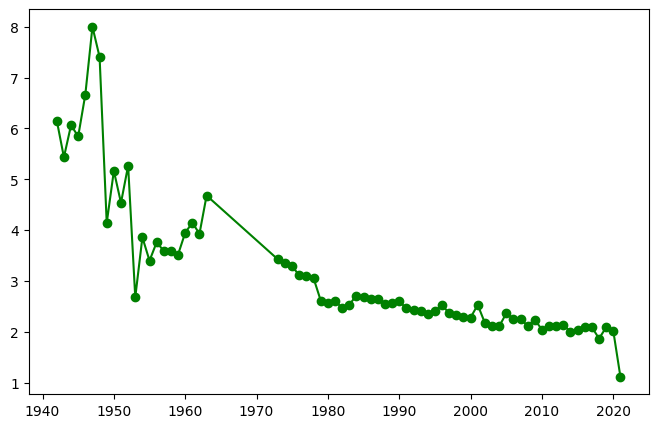

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
trend = df[['YEAR', 'TARGETS']].groupby('YEAR').mean()
plt.figure(figsize = (8, 5))
plt.plot(trend.index, trend['TARGETS'], '-o', color = 'green')
plt.show()



In [ ]:


groups2 = []
start = 0
for idx in (range(1, len(df))):
    if df.YEAR[idx-1] == df.YEAR[idx]:
        continue
    else:
        end = idx-1
        groups2.append((start, end))
        start = idx

groups2.append((start, len(df)-1))



In [ ]:
df[start:end+1][cols].shape

(0, 10)

In [ ]:
len(cols)

10

In [ ]:
to_be_imputed = ['HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure']

In [ ]:
from sklearn.impute import SimpleImputer

for start, end in (groups2):
#     columns = [col for col in cols if np.isnan(df[start:end+1][col]).any()]
    imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
    try:
        df.loc[start:end+1, cols] = imp1.fit_transform(df[to_be_imputed].loc[start:end+1, cols])
    except:
        pass



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919375 non-null  float64
 4   HourlyDryBulbTemperature   919375 non-null  float64
 5   HourlyPresentWeatherType   398214 non-null  object 
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919375 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     911824 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919388 non-null  float64
 13  HourlyWindSpeed            91

In [ ]:
blind_imputation = ['HourlyWindDirection', 'HourlyWindSpeed', 'HourlySeaLevelPressure', 'HourlyRelativeHumidity', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature']

In [ ]:


imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
df[blind_imputation] = imp1.fit_transform(df[blind_imputation])
# df[mode] = imp2.fit_transform(df[mode])



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919389 non-null  float64
 4   HourlyDryBulbTemperature   919389 non-null  float64
 5   HourlyPresentWeatherType   398214 non-null  object 
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919389 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     919389 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919389 non-null  float64
 13  HourlyWindSpeed            91

In [ ]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
0,42030099999,3066.0,NaN,61.00,81.0,NaN,NaN,66.0,0 0,29.78,NaN,NaN,0.0,0.0,1944,1,3,8,30,0.62
1,42030099999,3066.0,NaN,2.00,3.0,NaN,NaN,95.0,0 0,29.77,NaN,NaN,0.0,0.0,1944,1,7,8,30,0.62
2,42030099999,3066.0,NaN,3.75,14.0,NaN,NaN,95.0,0 0,29.74,NaN,NaN,0.0,0.0,1944,1,8,8,30,0.31
3,42030099999,3066.0,NaN,5.50,11.0,NaN,NaN,95.0,0 0,29.71,NaN,NaN,0.0,0.0,1944,1,22,8,30,0.62
4,42030099999,3066.0,NaN,7.25,7.0,NaN,NaN,95.0,0 0,29.49,NaN,NaN,0.0,0.0,1944,2,12,8,30,2.49


In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
0,42030099999,3066.0,NaN,61.00,81.0,NaN,NaN,66.0,0 0,29.78,NaN,NaN,0.0,0.0,1944,1,3,8,30,0.62
1,42030099999,3066.0,NaN,2.00,3.0,NaN,NaN,95.0,0 0,29.77,NaN,NaN,0.0,0.0,1944,1,7,8,30,0.62
2,42030099999,3066.0,NaN,3.75,14.0,NaN,NaN,95.0,0 0,29.74,NaN,NaN,0.0,0.0,1944,1,8,8,30,0.31
3,42030099999,3066.0,NaN,5.50,11.0,NaN,NaN,95.0,0 0,29.71,NaN,NaN,0.0,0.0,1944,1,22,8,30,0.62
4,42030099999,3066.0,NaN,7.25,7.0,NaN,NaN,95.0,0 0,29.49,NaN,NaN,0.0,0.0,1944,2,12,8,30,2.49


In [ ]:
encode_cols = ["HourlyPresentWeatherType", "HourlySkyConditions"]
for col in encode_cols:
    print(f"Feature: {col}")
#     df[col].info()
    print("\n")



for col in encode_cols:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("\n")



cat_vector_1 = df[encode_cols[0]].value_counts().index
cat_vector_1
cat_vector_1 = list(cat_vector_1)




enc_vector_1 = [cat_vector_1.index(cat) for cat in cat_vector_1]
enc_vector_1 = [i if i<7 else 7 for i in enc_vector_1]


encode_dict_1 = dict(zip(cat_vector_1, enc_vector_1))


encode_dict_1



# encoded from 0 to 8, 0 to 6 for major categories, 7 for minor, 8 for invalid or missing
encode_dict_1['|HZ |'] = 0
encode_dict_1['|DZ |'] = 6
encode_dict_1['|FU |'] = 3
encode_dict_1['||s'] = 8
encode_dict_1[np.nan] = 8

colm = df[encode_cols[0]].copy()
colm = pd.Series(map(lambda i: encode_dict_1.get(i, 8), colm))
colm.value_counts()

df[encode_cols[0]] = colm
df[encode_cols[1]].value_counts()[0:30]


cat_vector_2 = df[encode_cols[1]].value_counts().index
cat_vector_2




Feature: HourlyPresentWeatherType


Feature: HourlySkyConditions


Feature: HourlyPresentWeatherType
||HZ            282575
||DU             31208
||FG             25782
||FU             23407
||RA             18035
||TS              9195
||DZ              5828
||SHRA TS          823
||SHRA             246
||HZ DU            112
||FU HZ             96
||RA TS             95
||HZ RA             87
||FG FG             83
||SH                64
||FU FG             56
||FG RA             51
||TS RA             46
||DZ DZ             40
||HZ DZ             39
||s                 33
||RA RA             32
||HZ TS             30
||DU RA             21
||FC                21
||TS SHRA TS        19
||DU DU             18
||SQ                16
||DZ RA             15
||FG SHRA           11
||FG DZ             10
||HZ SHRA            9
||FU TS              9
||DU TS              8
||DRSN               7
||DU SHRA            7
||SHRASN             6
||FZRA               5
||HZ FG              5
||

Index(['CLR:00', '0  0', 'FEW:02 98', 'FEW:02 20', 'FEW:02 197', 'FEW:02 25',
       'SCT:03 20', 'VV:09', 'SCT:04 20 BKN:07 100', 'SCT:04 20',
       ...
       'SCT:03 25 SCT:04 98  197', 'SCT:03 34 FEW:01 39 BKN:05 197',
       'BKN:06 25 FEW:01 34 BKN:06 98', 'SCT:03 25 FEW:01 34 BKN:06 34',
       'SCT:03 9 BKN:05 20 FEW:01 30', 'SCT:04 20 FEW:01 30 BKN:05 30',
       'BKN:06 20 FEW:01 30 OVC:08 30', 'SCT:04 25 BKN:05 98 BKN:07 197',
       'SCT:04 25 BKN:05 30 BKN:06 197', 'FEW:02 20 SCT:04 25 BKN:05 79'],
      dtype='object', length=14868)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919389 non-null  float64
 4   HourlyDryBulbTemperature   919389 non-null  float64
 5   HourlyPresentWeatherType   919389 non-null  int64  
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919389 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     919389 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919389 non-null  float64
 13  HourlyWindSpeed            91

In [ ]:
df.STATION.value_counts()

42369099999    315023
42634099999    117932
42379099999    101433
42452099999     99965
42260099999     78487
42165099999     50598
42498099999     36030
42273099999     21639
42170099999     16405
42056099999     13673
42503099999     13424
42295099999     13180
42299099999      6697
42249099999      6047
42262099999      4197
42547099999      3120
42468099999      3100
42420099999      3079
42296099999      3018
42522099999      2979
42672099999      2936
42599099999      2761
42460099999      1547
42270099999      1479
42030099999       595
42117099999        19
42484099999        11
42151099999         9
42178099999         3
42074099999         2
42190099999         1
Name: STATION, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919389 non-null  float64
 4   HourlyDryBulbTemperature   919389 non-null  float64
 5   HourlyPresentWeatherType   919389 non-null  int64  
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919389 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     919389 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919389 non-null  float64
 13  HourlyWindSpeed            91

In [ ]:
df.describe()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
count,9.193890e+05,919389.000000,441579.000000,919389.000000,919389.000000,919389.000000,861653.000000,919389.000000,919389.00000,810986.000000,806773.000000,919389.000000,919389.000000,919389.000000,919389.000000,919389.000000,919389.000000,919389.000000,919389.000000
mean,4.238918e+10,194.450438,29.752802,61.424865,77.901892,4.884519,8.651280,63.029333,29.76255,28.684570,69.059551,139.607788,3.646916,1999.154604,6.539331,15.706358,12.397332,24.580544,2.527439
std,1.304858e+08,298.797662,0.178816,13.999228,14.200887,3.702064,1.536742,24.068992,0.24818,2.165308,9.872636,126.301774,12.935049,19.763927,3.456143,8.786984,6.457685,11.545451,1.760210
min,4.203010e+10,31.000000,29.180000,-53.000000,-36.000000,0.000000,0.000000,1.000000,26.71000,13.680000,28.000000,0.000000,0.000000,1942.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.236910e+10,81.680000,29.629717,51.000000,68.000000,0.000000,9.000000,44.000000,29.58000,28.276836,64.000000,0.000000,0.000000,1987.000000,4.000000,8.000000,8.000000,30.000000,1.240000
50%,4.236910e+10,124.960000,29.725000,61.000000,81.000000,8.000000,9.000000,66.000000,29.76000,29.576207,71.044071,100.000000,2.000000,2005.000000,7.000000,16.000000,11.000000,30.000000,2.490000
75%,4.245210e+10,167.940000,29.880000,75.000000,88.000000,8.000000,9.000000,84.000000,29.94000,29.782755,76.983235,270.000000,6.000000,2016.000000,10.000000,23.000000,17.000000,30.000000,2.490000
max,4.267210e+10,3066.000000,30.300000,97.000000,137.000000,8.000000,9.000000,100.000000,32.18000,31.650000,91.000000,360.000000,2237.000000,2021.000000,12.000000,31.000000,23.000000,55.000000,18.640000


In [ ]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
0,42030099999,3066.0,NaN,61.00,81.0,8,NaN,66.0,0 0,29.78,NaN,NaN,0.0,0.0,1944,1,3,8,30,0.62
1,42030099999,3066.0,NaN,2.00,3.0,8,NaN,95.0,0 0,29.77,NaN,NaN,0.0,0.0,1944,1,7,8,30,0.62
2,42030099999,3066.0,NaN,3.75,14.0,8,NaN,95.0,0 0,29.74,NaN,NaN,0.0,0.0,1944,1,8,8,30,0.31
3,42030099999,3066.0,NaN,5.50,11.0,8,NaN,95.0,0 0,29.71,NaN,NaN,0.0,0.0,1944,1,22,8,30,0.62
4,42030099999,3066.0,NaN,7.25,7.0,8,NaN,95.0,0 0,29.49,NaN,NaN,0.0,0.0,1944,2,12,8,30,2.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919389 non-null  float64
 4   HourlyDryBulbTemperature   919389 non-null  float64
 5   HourlyPresentWeatherType   919389 non-null  int64  
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919389 non-null  float64
 8   HourlySkyConditions        498177 non-null  object 
 9   HourlySeaLevelPressure     919389 non-null  float64
 10  HourlyStationPressure      810986 non-null  float64
 11  HourlyWetBulbTemperature   806773 non-null  float64
 12  HourlyWindDirection        919389 non-null  float64
 13  HourlyWindSpeed            91

In [ ]:
df.drop(['HourlySkyConditions'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919389 entries, 0 to 919388
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919389 non-null  int64  
 1   ELEVATION                  919389 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  919389 non-null  float64
 4   HourlyDryBulbTemperature   919389 non-null  float64
 5   HourlyPresentWeatherType   919389 non-null  int64  
 6   HourlyPressureTendency     861653 non-null  float64
 7   HourlyRelativeHumidity     919389 non-null  float64
 8   HourlySeaLevelPressure     919389 non-null  float64
 9   HourlyStationPressure      810986 non-null  float64
 10  HourlyWetBulbTemperature   806773 non-null  float64
 11  HourlyWindDirection        919389 non-null  float64
 12  HourlyWindSpeed            919389 non-null  float64
 13  YEAR                       91

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441579 entries, 1197 to 916452
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    441579 non-null  int64  
 1   ELEVATION                  441579 non-null  float64
 2   HourlyAltimeterSetting     441579 non-null  float64
 3   HourlyDewPointTemperature  441579 non-null  float64
 4   HourlyDryBulbTemperature   441579 non-null  float64
 5   HourlyPresentWeatherType   441579 non-null  int64  
 6   HourlyPressureTendency     441579 non-null  float64
 7   HourlyRelativeHumidity     441579 non-null  float64
 8   HourlySeaLevelPressure     441579 non-null  float64
 9   HourlyStationPressure      441579 non-null  float64
 10  HourlyWetBulbTemperature   441579 non-null  float64
 11  HourlyWindDirection        441579 non-null  float64
 12  HourlyWindSpeed            441579 non-null  float64
 13  YEAR                      

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
cols = []
for i in df.columns:
    print(i)
    if df[i].dtype != 'O':
        cols.append(i)

STATION
ELEVATION
HourlyAltimeterSetting
HourlyDewPointTemperature
HourlyDryBulbTemperature
HourlyPresentWeatherType
HourlyPressureTendency
HourlyRelativeHumidity
HourlySeaLevelPressure
HourlyStationPressure
HourlyWetBulbTemperature
HourlyWindDirection
HourlyWindSpeed
YEAR
MONTH
DAY
HOUR
MINUTES
TARGETS


In [ ]:
cols.pop()

'TARGETS'

In [ ]:
cols

['STATION',
 'ELEVATION',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPresentWeatherType',
 'HourlyPressureTendency',
 'HourlyRelativeHumidity',
 'HourlySeaLevelPressure',
 'HourlyStationPressure',
 'HourlyWetBulbTemperature',
 'HourlyWindDirection',
 'HourlyWindSpeed',
 'YEAR',
 'MONTH',
 'DAY',
 'HOUR',
 'MINUTES']

In [ ]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2)*(n - 1)/(n - p - 1)

In [ ]:
X = df[cols]
y = df['TARGETS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:


lr = LinearRegression()
lr.fit(X_train, y_train)



In [ ]:


y_pred = lr.predict(X_test)



In [ ]:
r2 = r2_score(y_pred, y_test)
r2


-0.284667573885274

In [ ]:
X_test.shape

(132474, 18)

In [ ]:
adj_r2 = adjusted_r2(r2, y_test.shape[0], X_test.shape[1])
adj_r2



-0.284842154054614

In [ ]:
mae = mean_squared_error(y_pred, y_test)
mae

0.5088340556405582

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Define hyperparameters for the RandomForestRegressor with reduced values
fast_params = {
    'n_estimators': 100,
    'max_depth': 5,  # Adjust this based on your data characteristics
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Create a RandomForestRegressor with reduced hyperparameters
rf = RandomForestRegressor(**fast_params, verbose=5)

# Fit the model to your training data
rf.fit(X_train, y_train)

# Predict on your test data
y_pred = rf.predict(X_test)

# Calculate R^2 score, adjusted R^2, and mean absolute error
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
print('Adjusted R^2:', adj_r2)

mae = mean_squared_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Save the RandomForestRegressor model using joblib
joblib.dump(rf, 'fast_random_forest_regressor_model.joblib')


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   23.3s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:  1.7min


building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


R^2: 0.5272964788260293
Adjusted R^2: 0.5272322406818963
Mean Absolute Error (MAE): 0.4281195689554394


['fast_random_forest_regressor_model.joblib']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Define fixed hyperparameters for the DecisionTreeRegressor
fixed_params_dt = {
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Create a DecisionTreeRegressor with fixed hyperparameters
dt = DecisionTreeRegressor(**fixed_params_dt)

# Fit the model to your training data
dt.fit(X_train, y_train)

# Predict on your test data
y_pred_dt = dt.predict(X_test)

# Calculate R^2 score, adjusted R^2, and mean absolute error
r2_dt = r2_score(y_test, y_pred_dt)
print('R^2 for Decision Tree:', r2_dt)

adj_r2_dt = adjusted_r2(r2_dt, len(y_test), X_test.shape[1])
print('Adjusted R^2 for Decision Tree:', adj_r2_dt)

mae_dt = mean_squared_error(y_test, y_pred_dt)
print('Mean Absolute Error (MAE) for Decision Tree:', mae_dt)

# Save the DecisionTreeRegressor model using joblib
joblib.dump(dt, 'decision_tree_regressor_model.joblib')


R^2 for Decision Tree: 0.6637527091879304
Adjusted R^2 for Decision Tree: 0.6637070147918365
Mean Absolute Error (MAE) for Decision Tree: 0.30453347342830056


['decision_tree_regressor_model.joblib']